In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
import os

with zipfile.ZipFile('/content/drive/MyDrive/ilish.zip', 'r') as zip_ref:
    zip_ref.extractall('')
with zipfile.ZipFile('/content/drive/MyDrive/sardin.zip', 'r') as zip_ref:
    zip_ref.extractall('')
with zipfile.ZipFile('/content/drive/MyDrive/chandana.zip', 'r') as zip_ref:
    zip_ref.extractall('')

**Importing the Dependencies**

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [4]:
Ilish_pic= os.listdir('ilish')
print(Ilish_pic[0:5])
print(Ilish_pic[-5:])

print()

['6373.webp', '5810.webp', '1162.webp', '3737.webp', '5992.webp']
['3880.webp', '8808.webp', '131.webp', '8749.webp', '4243.webp']



In [5]:
Sardin_pic= os.listdir('sardin')

In [6]:
Chandana_pic= os.listdir('chandana')

In [7]:
print('Ilish images:', len(Ilish_pic))
print('Sardin images:', len(Sardin_pic))
print('Chandana images:', len(Chandana_pic))

Ilish images: 10000
Sardin images: 10000
Chandana images: 10000


**Creating Labels for the two class of Images**

Ilish  -->   0

Sardin  -->  1

Chandana --> 2

In [8]:
# create the labels

Ilish_labels = [0]*4000

Sardin_labels = [1]*4000

Chandana_labels = [2]*4000

In [9]:
print(Ilish_labels[0:5])

print(Sardin_labels[0:5])

print(Chandana_labels[0:5])

[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]
[2, 2, 2, 2, 2]


In [10]:
print(len(Ilish_labels))
print(len(Sardin_labels))
print(len(Chandana_labels))

4000
4000
4000


In [11]:
labels = Ilish_labels + Sardin_labels + Chandana_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

12000
[0, 0, 0, 0, 0]
[2, 2, 2, 2, 2]


**Displaying the Images**

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [12]:
# # Convert images to numpy arrays
# data = []
# image_number = 4000  # Number of images to select from each type

# # Process ilish images
# ilish_path = 'ilish/'
# for img_file in Ilish_pic[:image_number]:
#     image = Image.open(ilish_path + img_file)
#     image = image.resize((256, 256))
#     image = image.convert('RGB')
#     image = np.array(image)
#     data.append(image)

# # Process sardin images
# sardin_path = 'sardin/'
# for img_file in Sardin_pic[:image_number]:
#     image = Image.open(sardin_path + img_file)
#     image = image.resize((256, 256))
#     image = image.convert('RGB')
#     image = np.array(image)
#     data.append(image)

# # Process chandana images
# chandana_path = 'chandana/'
# for img_file in Chandana_pic[:image_number]:
#     image = Image.open(chandana_path + img_file)
#     image = image.resize((256, 256))
#     image = image.convert('RGB')
#     image = np.array(image)
#     print(image.shape)
#     data.append(image)

# # Now, `data` contains 4000 images from each type, for a total of 12,000 images.

import numpy as np
import random
from PIL import Image

# Parameters
image_number = 4000  # Number of images to select from each type

# Initialize the list to store the images
data = []

# Process ilish images
ilish_path = 'ilish/'
Ilish_pic = sorted(os.listdir(ilish_path))  # Make sure the images are in order
random.shuffle(Ilish_pic)  # Shuffle images to get random ones
for img_file in Ilish_pic[:image_number]:
    image = Image.open(ilish_path + img_file)
    image = image.resize((256, 256))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

# Process sardin images
sardin_path = 'sardin/'
Sardin_pic = sorted(os.listdir(sardin_path))  # Make sure the images are in order
random.shuffle(Sardin_pic)  # Shuffle images to get random ones
for img_file in Sardin_pic[:image_number]:
    image = Image.open(sardin_path + img_file)
    image = image.resize((256, 256))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

# Process chandana images
chandana_path = 'chandana/'
Chandana_pic = sorted(os.listdir(chandana_path))  # Make sure the images are in order
random.shuffle(Chandana_pic)  # Shuffle images to get random ones
for img_file in Chandana_pic[:image_number]:
    image = Image.open(chandana_path + img_file)
    image = image.resize((256, 256))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

# Now, `data` contains 4000 random images from each type, for a total of 12,000 images.



array([[[219, 212, 196],
        [234, 227, 211],
        [232, 223, 206],
        ...,
        [182, 181, 177],
        [189, 188, 184],
        [194, 190, 187]],

       [[239, 232, 216],
        [246, 239, 223],
        [232, 223, 206],
        ...,
        [180, 179, 175],
        [188, 186, 184],
        [189, 186, 183]],

       [[236, 229, 213],
        [242, 234, 222],
        [233, 226, 208],
        ...,
        [182, 178, 175],
        [179, 175, 172],
        [196, 194, 190]],

       ...,

       [[192, 188, 181],
        [197, 194, 187],
        [202, 199, 192],
        ...,
        [207, 202, 199],
        [200, 195, 192],
        [207, 202, 199]],

       [[202, 197, 191],
        [198, 195, 188],
        [201, 198, 193],
        ...,
        [205, 201, 198],
        [213, 210, 208],
        [215, 211, 208]],

       [[201, 199, 191],
        [198, 195, 188],
        [196, 193, 189],
        ...,
        [214, 210, 207],
        [213, 209, 206],
        [207, 203, 202]]], dtype=uint8)
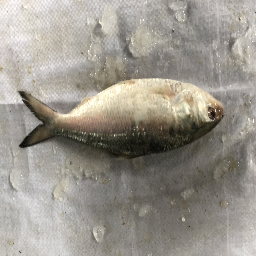

In [13]:
data[50]

In [14]:
type(data)

list

In [15]:
len(data)

12000

array([[[ 44,  35,  32],
        [ 36,  31,  26],
        [ 53,  46,  40],
        ...,
        [160, 160, 158],
        [151, 152, 147],
        [152, 151, 146]],

       [[ 43,  33,  29],
        [ 49,  44,  38],
        [ 35,  28,  22],
        ...,
        [169, 171, 168],
        [156, 157, 152],
        [150, 151, 146]],

       [[ 32,  25,  17],
        [ 42,  35,  29],
        [ 43,  34,  29],
        ...,
        [167, 167, 165],
        [153, 154, 151],
        [151, 151, 147]],

       ...,

       [[160, 164, 163],
        [151, 152, 154],
        [156, 160, 161],
        ...,
        [185, 187, 184],
        [195, 195, 193],
        [198, 199, 195]],

       [[165, 169, 170],
        [155, 156, 158],
        [149, 153, 154],
        ...,
        [193, 195, 192],
        [198, 199, 194],
        [180, 181, 177]],

       [[178, 182, 183],
        [155, 157, 161],
        [160, 161, 165],
        ...,
        [192, 193, 191],
        [198, 199, 194],
        [178, 180, 176]]], dtype=uint8)
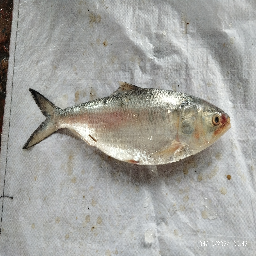

In [16]:
data[0]

In [17]:
type(data[0])

numpy.ndarray

In [18]:
data[0].shape

(256, 256, 3)

In [19]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [20]:
type(X)

numpy.ndarray

In [21]:
type(Y)

numpy.ndarray

In [22]:
print(X.shape)
print(Y.shape)

(12000, 256, 256, 3)
(12000,)


In [23]:
print(Y)

[0 0 0 ... 2 2 2]


**Train Test Split**

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(12000, 256, 256, 3) (9600, 256, 256, 3) (2400, 256, 256, 3)


In [26]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[134, 170, 191],
        [152, 150, 229],
        [255, 245, 150],
        ...,
        [147, 134, 158],
        [ 96, 129, 200],
        [155, 255,  87]],

       [[255, 145, 152],
        [248, 221, 189],
        [ 96, 208, 218],
        ...,
        [183, 175, 180],
        [ 98, 180, 175],
        [150, 104, 179]],

       [[230, 173,  94],
        [194,  72, 215],
        [220, 126, 229],
        ...,
        [128, 243, 137],
        [ 90, 166, 165],
        [146, 141, 219]],

       ...,

       [[186, 184, 118],
        [184, 140, 115],
        [129, 169, 170],
        ...,
        [175, 155,  65],
        [114, 219, 132],
        [192, 116,  85]],

       [[ 61,  35, 161],
        [129, 171, 138],
        [131,  86, 179],
        ...,
        [123, 178, 126],
        [124, 236, 255],
        [124, 224, 214]],

       [[197,  54,  93],
        [ 63, 175, 130],
        [ 79,  81, 182],
        ...,
        [ 74, 157, 194],
        [ 64, 176, 126],
        [106, 199, 142]]], dtype=uint8)
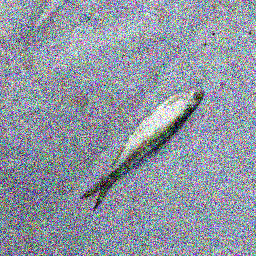

In [27]:
X_train[0]

In [28]:
X_train_scaled[0]

array([[[0.5254902 , 0.66666667, 0.74901961],
        [0.59607843, 0.58823529, 0.89803922],
        [1.        , 0.96078431, 0.58823529],
        ...,
        [0.57647059, 0.5254902 , 0.61960784],
        [0.37647059, 0.50588235, 0.78431373],
        [0.60784314, 1.        , 0.34117647]],

       [[1.        , 0.56862745, 0.59607843],
        [0.97254902, 0.86666667, 0.74117647],
        [0.37647059, 0.81568627, 0.85490196],
        ...,
        [0.71764706, 0.68627451, 0.70588235],
        [0.38431373, 0.70588235, 0.68627451],
        [0.58823529, 0.40784314, 0.70196078]],

       [[0.90196078, 0.67843137, 0.36862745],
        [0.76078431, 0.28235294, 0.84313725],
        [0.8627451 , 0.49411765, 0.89803922],
        ...,
        [0.50196078, 0.95294118, 0.5372549 ],
        [0.35294118, 0.65098039, 0.64705882],
        [0.57254902, 0.55294118, 0.85882353]],

       ...,

       [[0.72941176, 0.72156863, 0.4627451 ],
        [0.72156863, 0.54901961, 0.45098039],
        [0.50588235, 0

**Building a Convolutional Neural Networks (CNN)**

In [52]:
import tensorflow as tf
from tensorflow import keras

In [53]:
# from sklearn.model_selection import KFold
# import keras
# from keras import layers, models
# import numpy as np

# # Define the model creation function
# def create_model(learning_rate, num_filters, kernel_size, input_shape, num_of_classes):
#     model = models.Sequential()

#     model.add(layers.Conv2D(num_filters, kernel_size, activation='relu', input_shape=input_shape))
#     model.add(layers.MaxPooling2D())

#     model.add(layers.Conv2D(num_filters * 2, kernel_size, activation='relu'))
#     model.add(layers.MaxPooling2D())

#     model.add(layers.Flatten())

#     model.add(layers.Dense(64, activation='relu'))
#     model.add(keras.layers.Dropout(0.5))

#     model.add(layers.Dense(32, activation='relu'))
#     model.add(keras.layers.Dropout(0.5))

#     model.add(layers.Dense(num_of_classes, activation='softmax'))

#     model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
#                   loss='sparse_categorical_crossentropy',
#                   metrics=['accuracy'])

#     return model


#Base CNN

In [55]:
num_of_classes = 3

model = keras.Sequential()

model.add(keras.layers.Conv2D(57, kernel_size=(3,3), activation='relu', input_shape=(256,256,3)))
model.add(keras.layers.MaxPooling2D())  #pool_size=(2,2)


model.add(layers.Conv2D(174, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D())


model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.5))



model.add(keras.layers.Dense(num_of_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
# Print the model summary
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 254, 254, 57)        │           1,596 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 127, 127, 57)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 125, 125, 174)       │          89,436 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 62, 62, 174)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 668856)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │      42,806,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,900,059 (163.65 MB)

 Trainable params: 42,900,059 (163.65 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
# compile the neural network
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00025686890659545365),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [59]:
# # training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=25)

Epoch 1/25
270/270 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - acc: 0.3890 - loss: 1.0814 - val_acc: 0.4125 - val_loss: 1.0600
Epoch 2/25
270/270 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - acc: 0.3690 - loss: 1.0778 - val_acc: 0.4094 - val_loss: 1.0585
Epoch 3/25
270/270 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - acc: 0.3768 - loss: 1.0704 - val_acc: 0.4062 - val_loss: 1.0618
Epoch 4/25
270/270 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - acc: 0.3728 - loss: 1.0645 - val_acc: 0.3542 - val_loss: 1.0489
Epoch 5/25
270/270 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - acc: 0.3780 - loss: 1.0558 - val_acc: 0.3615 - val_loss: 1.0507
Epoch 6/25
270/270 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - acc: 0.3863 - loss: 1.0450 - val_acc: 0.3677 - val_loss: 1.0432
Epoch 7/25
270/270 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - acc: 0.3953 - loss: 1.0429 - val_acc: 0.3729 - val_loss: 1.0405
Epoch 8/25
270/270 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - acc: 0.3896 - loss: 1.0379 - val_acc: 0.3698 - val_loss: 1.0374
Epoch 9/25
270/270 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms

In [60]:
loss, accuracy = model.evaluate(X_train_scaled, Y_train)
print('Train Accuracy =', accuracy)

300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - acc: 0.8968 - loss: 0.3860
Train Accuracy = 0.8912500143051147


In [61]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)

print('Test Accuracy =', accuracy)

75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - acc: 0.8590 - loss: 0.4764
Test Accuracy = 0.8566666841506958


In [62]:
y_pred=model.predict(X_test_scaled)

y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred_classes)

75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
[1 1 1 ... 2 2 1]


In [63]:
from sklearn.metrics import accuracy_score

# Example for classification predictions
accuracy = accuracy_score(Y_test, y_pred_classes)  # y_pred_classes should be class labels
print(f"Accuracy Score: {accuracy}")


Accuracy Score: 0.8566666666666667


In [64]:
from sklearn.metrics import r2_score

r2 = r2_score(Y_test, y_pred_classes)
print (f"R² Score: {r2}")

R² Score: 0.6211547994886112


75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Confusion Matrix:
[[761  40  23]
 [ 36 745  21]
 [ 64 160 550]]


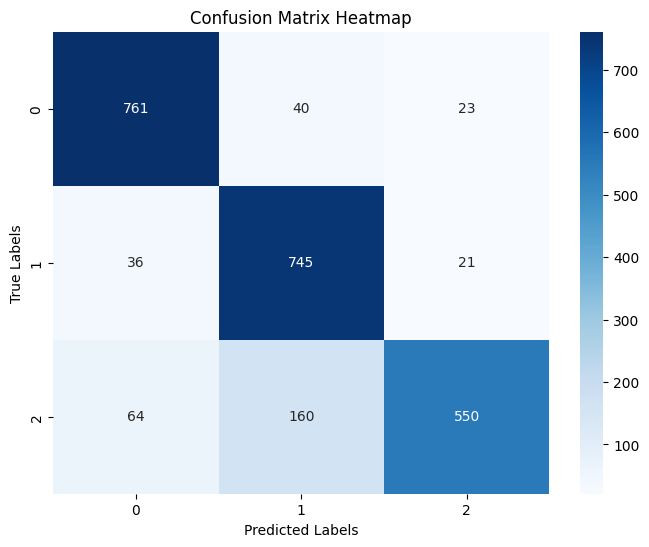

In [65]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions and convert to class labels
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred_classes)

# Print the confusion matrix (optional)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y_test), yticklabels=np.unique(Y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()



Classification Metrics:
Precision: 0.8655
Recall: 0.8567
F1 Score: 0.8544

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       824
           1       0.79      0.93      0.85       802
           2       0.93      0.71      0.80       774

    accuracy                           0.86      2400
   macro avg       0.87      0.85      0.85      2400
weighted avg       0.87      0.86      0.85      2400



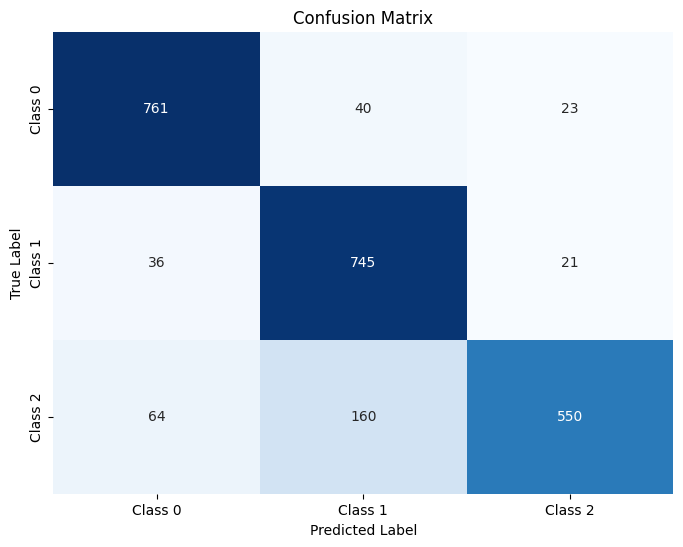

<ipython-input-70-5d372593e538>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Score', data=metrics_df, palette='viridis')


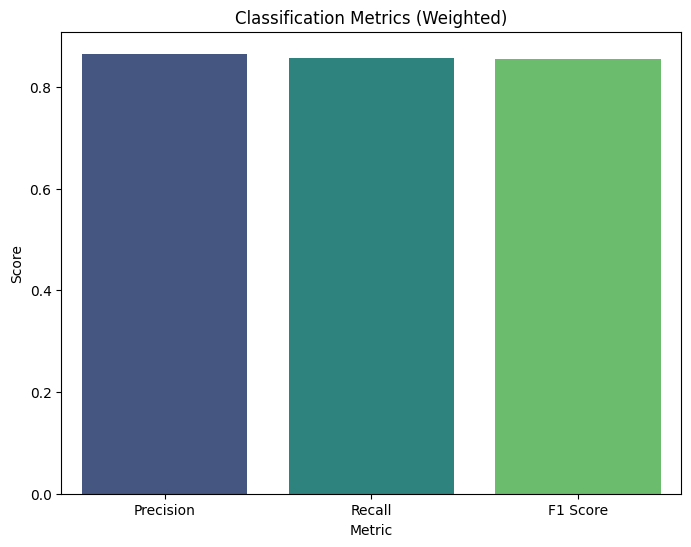

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
import pandas as pd

# Assuming y_pred_classes is the predicted labels and Y_test is the true labels
# Compute precision, recall, and F1 score
precision = precision_score(Y_test, y_pred_classes, average='weighted')
recall = recall_score(Y_test, y_pred_classes, average='weighted')
f1 = f1_score(Y_test, y_pred_classes, average='weighted')

# Print metrics
print("\nClassification Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification report for detailed metrics per class
print("\nClassification Report:")
print(classification_report(Y_test, y_pred_classes))

# Confusion Matrix
cm = confusion_matrix(Y_test, y_pred_classes)

# Plot Confusion Matrix using Seaborn Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'], cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Precision, Recall, and F1 Score for each class
# Let's assume your model has 3 classes
metrics = {'Precision': precision, 'Recall': recall, 'F1 Score': f1}

# You can create a barplot to visualize precision, recall, and F1 score for each class
metrics_data = {
    'Metric': ['Precision', 'Recall', 'F1 Score'],
    'Score': [precision, recall, f1]
}

# Create the seaborn barplot
metrics_df = pd.DataFrame(metrics_data)
plt.figure(figsize=(8, 6))
sns.barplot(x='Metric', y='Score', data=metrics_df, palette='viridis')
plt.title('Classification Metrics (Weighted)')
plt.show()


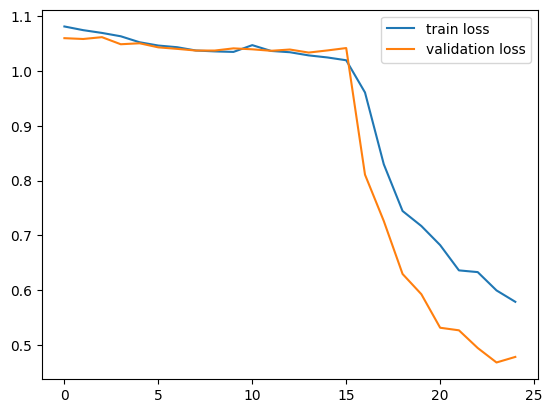

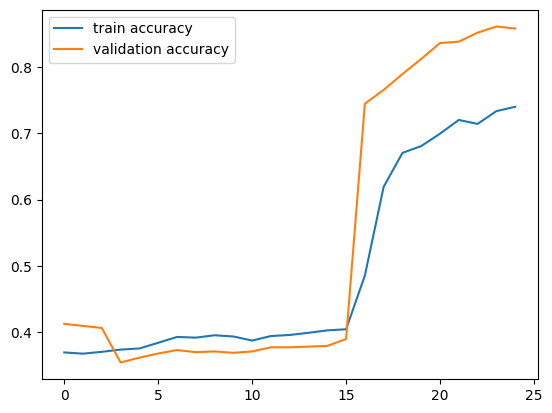

In [71]:
h = history


plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()


plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

#With K-Fold [Cross Validation]


Training Fold 1...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 23s 53ms/step - accuracy: 0.3879 - loss: 1.4047 - val_accuracy: 0.5703 - val_loss: 0.9198
Epoch 2/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.5341 - loss: 0.9574 - val_accuracy: 0.5797 - val_loss: 0.8504
Epoch 3/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.5631 - loss: 0.8882 - val_accuracy: 0.5849 - val_loss: 0.8167
Epoch 4/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.5893 - loss: 0.8616 - val_accuracy: 0.5828 - val_loss: 0.7792
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.5932 - loss: 0.8176 - val_accuracy: 0.6854 - val_loss: 0.7257
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.6531 - loss: 0.7653 - val_accuracy: 0.7229 - val_loss: 0.7224
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.7145 - loss: 0.7073 - val_accuracy: 0.8016 - val_loss: 0.5993
Epoch 8/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.7652 - loss: 0.6483 - val_acc

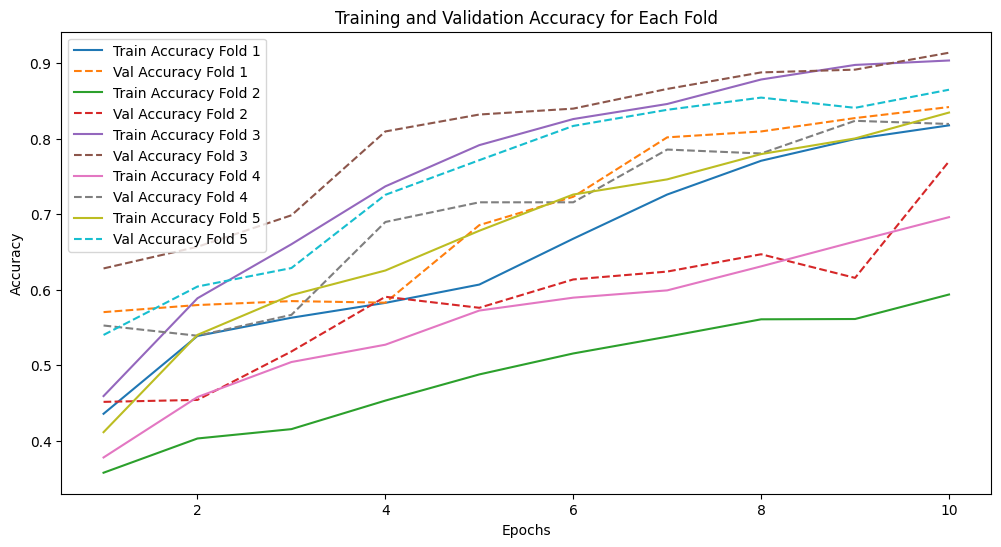

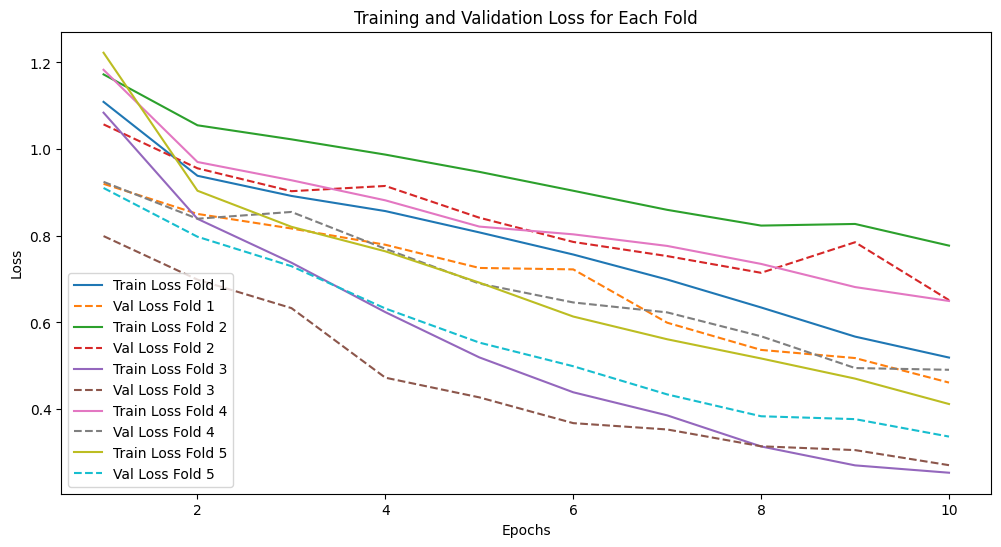

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.3289 - loss: 1.3577
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.3256 - loss: 1.0987
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.3385 - loss: 1.0986
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.3395 - loss: 1.0985
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.3357 - loss: 1.0988
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.3378 - loss: 1.0986
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.3354 - loss: 1.0986
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.3288 - loss: 1.0987
Epoch 9/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.3302 - loss: 1.0987
Epoch 10/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.3403 - loss: 1.0986


In [31]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold

# K-Fold Cross-Validation setup
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
scores = []
history_list = []  # To store history objects for each fold

# Initialize lists to store fold-wise results
train_accuracies = []
val_accuracies = []
train_losses = []
val_losses = []

for train_index, val_index in kfold.split(X_train_scaled, Y_train):
    print(f"\nTraining Fold {fold_no}...")

    # Split data into training and validation for this fold
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    Y_train_fold, Y_val_fold = Y_train[train_index], Y_train[val_index]

    # Create the model
    model = create_model(
        learning_rate=0.00025686890659545365,
        num_filters=87,
        kernel_size=(3, 3),
        input_shape=(256, 256, 3),
        num_of_classes=3
    )

    # Train the model
    history = model.fit(
        X_train_fold, Y_train_fold,
        validation_data=(X_val_fold, Y_val_fold),
        epochs=10,
        batch_size=32,
        verbose=1
    )

    # Store the training and validation metrics for each fold
    train_accuracies.append(history.history['accuracy'])
    val_accuracies.append(history.history['val_accuracy'])
    train_losses.append(history.history['loss'])
    val_losses.append(history.history['val_loss'])

    # Evaluate the model
    loss, accuracy = model.evaluate(X_val_fold, Y_val_fold, verbose=0)
    print(f"Fold {fold_no} - Loss: {loss}, Accuracy: {accuracy}")

    scores.append(accuracy)
    fold_no += 1

# Print average accuracy across folds
print(f"\nAverage Validation Accuracy: {np.mean(scores)}")

# Plotting the training and validation accuracy for each fold
plt.figure(figsize=(12, 6))
for i in range(len(train_accuracies)):
    plt.plot(range(1, 11), train_accuracies[i], label=f'Train Accuracy Fold {i+1}')
    plt.plot(range(1, 11), val_accuracies[i], label=f'Val Accuracy Fold {i+1}', linestyle='--')

plt.title('Training and Validation Accuracy for Each Fold')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting the training and validation loss for each fold
plt.figure(figsize=(12, 6))
for i in range(len(train_losses)):
    plt.plot(range(1, 11), train_losses[i], label=f'Train Loss Fold {i+1}')
    plt.plot(range(1, 11), val_losses[i], label=f'Val Loss Fold {i+1}', linestyle='--')

plt.title('Training and Validation Loss for Each Fold')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Final evaluation on the test set
final_model = create_model(
    learning_rate=0.00025686890659545365,
    num_filters=87,
    kernel_size=(3, 3),
    input_shape=(256, 256, 3),
    num_of_classes=3
)

# Train the final model on the full training set
final_model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=1)


In [32]:
# import optuna

# def objective(trial):
#     learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
#     num_filters = trial.suggest_int('num_filters', 16, 128)
#     kernel_size = trial.suggest_categorical('kernel_size', [3, 7])


#     model = create_model(learning_rate, num_filters, kernel_size)


#     #(X_train, Y_train), (X_test, Y_test) = keras.datasets.cifar10.load_data()
#     #x_train, x_val = x_train / 255.0, x_val / 255.0


#     model.fit(X_train_scaled, Y_train, epochs=8, validation_data=(X_test_scaled, Y_test), verbose=0)
#     score = model.evaluate(X_test_scaled, Y_test, verbose=0)
#     return score[1]


In [33]:
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=50)

In [34]:
# best_params = study.best_params
# print("Best hyperparameters: ", best_params)

In [37]:
# # compile the neural network
# model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00025686890659545365),
#               loss='sparse_categorical_crossentropy',
#               metrics=['acc'])

In [38]:
# # training the neural network
# history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=50)

**Model Evaluation**

In [39]:
loss, accuracy = model.evaluate(X_train_scaled, Y_train)
print('Train Accuracy =', accuracy)

300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8986 - loss: 0.2498
Train Accuracy = 0.8940625190734863


In [40]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)

print('Test Accuracy =', accuracy)

75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8736 - loss: 0.3212
Test Accuracy = 0.8683333396911621


In [41]:
y_pred=model.predict(X_test_scaled)

y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred_classes)

75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
[1 1 1 ... 2 2 2]


In [42]:
from sklearn.metrics import accuracy_score

# Example for classification predictions
accuracy = accuracy_score(Y_test, y_pred_classes)  # y_pred_classes should be class labels
print(f"Accuracy Score: {accuracy}")


Accuracy Score: 0.8683333333333333


In [43]:
from sklearn.metrics import r2_score

r2 = r2_score(Y_test, y_pred_classes)
print (f"R² Score: {r2}")

R² Score: 0.5729381376053435


75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Confusion Matrix:
[[746  54  24]
 [ 54 716  32]
 [ 98  54 622]]


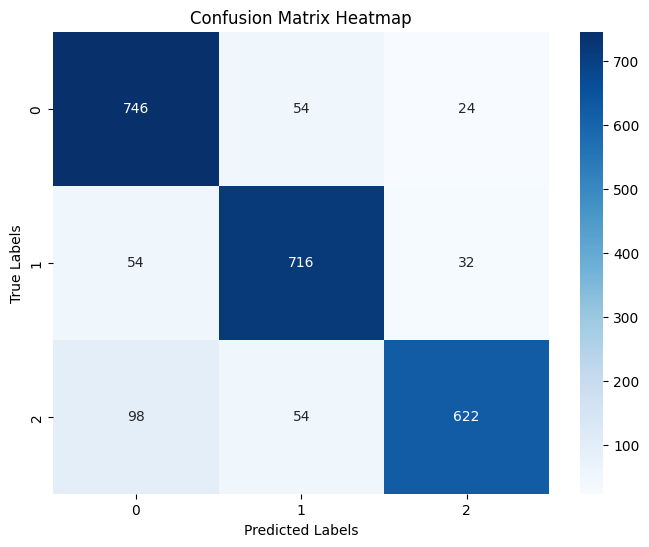

In [44]:
# from sklearn.metrics import confusion_matrix, classification_report
# import numpy as np

# y_pred = model.predict(X_test_scaled)
# y_pred_classes = np.argmax(y_pred, axis=1)


# #conf_matrix = confusion_matrix(np.argmax(Y_test, axis=1), y_pred_classes)
# conf_matrix = confusion_matrix(Y_test, y_pred_classes)
# print("Confusion Matrix:")
# print(conf_matrix)
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions and convert to class labels
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred_classes)

# Print the confusion matrix (optional)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y_test), yticklabels=np.unique(Y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Confusion Matrix:
[[746  54  24]
 [ 54 716  32]
 [ 98  54 622]]


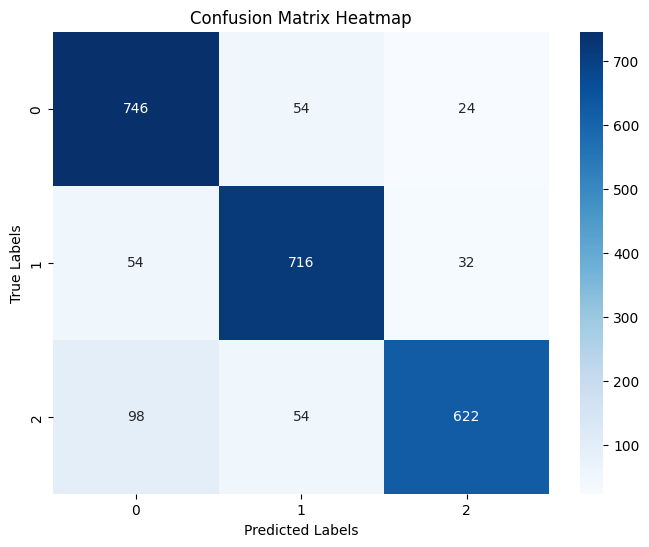

In [45]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions and convert to class labels
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y_test), yticklabels=np.unique(Y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [46]:

# Compute precision, recall, and F1 score
precision = precision_score(Y_test, y_pred_classes, average='weighted')
recall = recall_score(Y_test, y_pred_classes, average='weighted')
f1 = f1_score(Y_test, y_pred_classes, average='weighted')

# Print metrics
print("\nClassification Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification report for detailed metrics per class
print("\nClassification Report:")
print(classification_report(Y_test, y_pred_classes))


Classification Metrics:
Precision: 0.8714
Recall: 0.8683
F1 Score: 0.8681

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       824
           1       0.87      0.89      0.88       802
           2       0.92      0.80      0.86       774

    accuracy                           0.87      2400
   macro avg       0.87      0.87      0.87      2400
weighted avg       0.87      0.87      0.87      2400



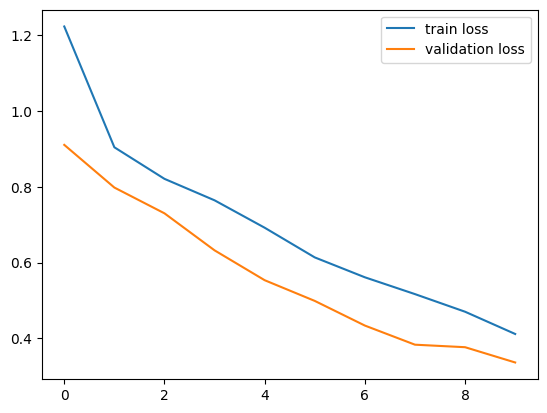

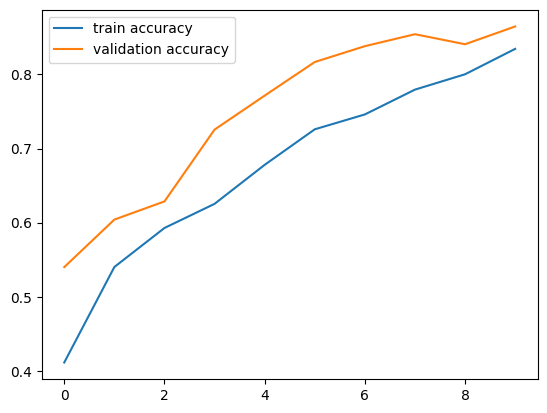

In [50]:
h = history


plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()


plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [51]:
# After training the model
model.save('cnn_with_k-fold_model.h5')
print("Model saved successfully!")


Model saved successfully!


In [ ]:
#import pickle

#with open('fish_model.pkl', 'wb') as file:
 #   pickle.dump(model, file)

In [ ]:

# model.save('CNN_model.keras')


In [ ]:
# # from keras.models import load_model

# model = load_model('fish_model.h5')
# print("Model loaded successfully!")


In [ ]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# # Specify the directory path
# base_path = 'ilish/'

# # Get the image file name from user input
# image_file_name = input('Enter the name of the image file (with extension): ')

# # Combine the base path with the user input to get the full path
# input_image_path = base_path + image_file_name

# # Debug: Print the full image path
# print(f"Trying to load image from: {input_image_path}")

# # Load the image
# input_image = cv2.imread(input_image_path)

# # Check if the image was loaded successfully
# if input_image is None:
#     print(f"Error: Unable to load image at {input_image_path}. Please check the file name and path.")
# else:
#     # Convert image from BGR to RGB for displaying with matplotlib
#     input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

#     # Display the image using matplotlib
#     plt.imshow(input_image_rgb)
#     plt.axis('off')  # Hide axis
#     plt.show()

#     # Resize the image and preprocess for prediction
#     input_image_resized = cv2.resize(input_image, (256, 256))
#     input_image_scaled = input_image_resized / 255.0
#     input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

#     # Make a prediction
#     input_prediction = model.predict(input_image_reshaped)
#     print(input_prediction)

#     # Get the predicted class label
#     input_pred_label = np.argmax(input_prediction)
#     print(input_pred_label)

#     # Display the result based on the predicted label
#     if input_pred_label == 0:
#         print('The Fish is Ilish')
#     elif input_pred_label == 1:
#         print('The Fish is Sardin')
#     else:
#         print('The Fish is Chandina')

#RMS Prop Optimizer

In [ ]:
from sklearn.model_selection import KFold
import keras
from keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Define the model creation function
def create_model(learning_rate, num_filters, kernel_size, input_shape, num_of_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(num_filters, kernel_size, activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D())
    model.add(layers.Conv2D(num_filters * 2, kernel_size, activation='relu'))
    model.add(layers.MaxPooling2D())
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_of_classes, activation='softmax'))

    model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Normalize data (if not already normalized)
# X_train_scaled = X_train / 255.0
# X_test_scaled = X_test / 255.0

# Parameters
learning_rate = 0.00025686890659545365
num_filters = 87
kernel_size = (3, 3)
input_shape = (128, 128, 3)
num_of_classes = 3

# K-Fold Cross-Validation setup
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
scores = []

for train_index, val_index in kfold.split(X_train_scaled, Y_train):
    print(f"\nTraining Fold {fold_no}...")

    # Split data into training and validation for this fold
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    Y_train_fold, Y_val_fold = Y_train[train_index], Y_train[val_index]

    # Create the model
    model = create_model(
        learning_rate=learning_rate,
        num_filters=num_filters,
        kernel_size=kernel_size,
        input_shape=input_shape,
        num_of_classes=num_of_classes
    )

    # Train the model
    history = model.fit(
        X_train_fold, Y_train_fold,
        validation_data=(X_val_fold, Y_val_fold),
        epochs=10,
        batch_size=32,
        verbose=1
    )

    # Evaluate the model
    loss, accuracy = model.evaluate(X_val_fold, Y_val_fold, verbose=0)
    print(f"Fold {fold_no} - Loss: {loss}, Accuracy: {accuracy}")

    scores.append(accuracy)
    fold_no += 1

# Print average accuracy across folds
print(f"\nAverage Validation Accuracy: {np.mean(scores):.4f}")

# Final evaluation on the test set
final_model = create_model(
    learning_rate=learning_rate,
    num_filters=num_filters,
    kernel_size=kernel_size,
    input_shape=input_shape,
    num_of_classes=num_of_classes
)

# Train the final model on the full training set
history = final_model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model on the training and test sets
train_loss, train_accuracy = final_model.evaluate(X_train_scaled, Y_train, verbose=0)
test_loss, test_accuracy = final_model.evaluate(X_test_scaled, Y_test, verbose=0)

print(f'\nTrain Accuracy = {train_accuracy:.4f}')
print(f'Test Accuracy = {test_accuracy:.4f}')

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


#RESNET50

In [ ]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [ ]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(128,128,3))
convolutional_base.summary()

In [ ]:
num_of_classes = 3

model = models.Sequential()


# model.add(layers.UpSampling2D((2,2)))
# model.add(layers.UpSampling2D((2,2)))
# model.add(layers.UpSampling2D((2,2)))


model.add(convolutional_base)


model.add(layers.Flatten())
model.add(layers.BatchNormalization())


model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())


model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())


model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())


model.add(layers.Dense(num_of_classes, activation='softmax'))

#RMS Optimizer

In [ ]:
model.compile(optimizer=RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
# Now fit the model with resized images
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=20)

In [ ]:
loss, accuracy = model.evaluate(X_train_scaled, Y_train)
print('Train Accuracy =', accuracy)

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

In [ ]:
y_pred=model.predict(X_test_scaled)

y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred_classes)

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(Y_test, y_pred_classes)
print(f"R² Score: {r2}")

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:

# Compute precision, recall, and F1 score
precision = precision_score(Y_test, y_pred_classes, average='weighted')
recall = recall_score(Y_test, y_pred_classes, average='weighted')
f1 = f1_score(Y_test, y_pred_classes, average='weighted')

# Print metrics
print("\nClassification Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification report for detailed metrics per class
print("\nClassification Report:")
print(classification_report(Y_test, y_pred_classes))

In [ ]:
h = history


plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()


plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [ ]:
model.save('resnet_model.h5')

#Adam Optimizer

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, r2_score
import keras
from keras import layers, models
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the model creation function
def create_model(learning_rate, input_shape, num_of_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D())
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D())
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D())
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_of_classes, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Parameters
learning_rate = 2e-5
input_shape = (128, 128, 3)
num_of_classes = 3
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Store metrics
fold_no = 1
scores = []
histories = []

for train_index, val_index in kfold.split(X_train_scaled, Y_train):
    print(f"\nTraining Fold {fold_no}...")

    # Split data for this fold
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    Y_train_fold, Y_val_fold = Y_train[train_index], Y_train[val_index]

    # Create the model
    model = create_model(learning_rate, input_shape, num_of_classes)

    # Train the model
    history = model.fit(
        X_train_fold, Y_train_fold,
        validation_data=(X_val_fold, Y_val_fold),
        epochs=20,
        batch_size=32,
        verbose=1
    )
    histories.append(history)

    # Evaluate the model on validation set
    loss, accuracy = model.evaluate(X_val_fold, Y_val_fold, verbose=0)
    print(f"Fold {fold_no} - Validation Loss: {loss}, Validation Accuracy: {accuracy}")
    scores.append(accuracy)
    fold_no += 1

# Average accuracy across folds
print(f"\nAverage Validation Accuracy: {np.mean(scores):.4f}")

# Train final model on full training data
final_model = create_model(learning_rate, input_shape, num_of_classes)
final_history = final_model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=20, batch_size=32, verbose=1)

# Evaluate on the test set
test_loss, test_accuracy = final_model.evaluate(X_test_scaled, Y_test, verbose=0)
print(f"\nTest Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Predictions
y_pred = final_model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
print("\nPredicted Classes:")
print(y_pred_classes)

# R² Score
r2 = r2_score(Y_test, y_pred_classes)
print(f"R² Score: {r2:.4f}")

# Confusion Matrix
cm = confusion_matrix(Y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Precision, Recall, F1 Score
precision = precision_score(Y_test, y_pred_classes, average='weighted')
recall = recall_score(Y_test, y_pred_classes, average='weighted')
f1 = f1_score(Y_test, y_pred_classes, average='weighted')

print("\nClassification Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(Y_test, y_pred_classes))

# Plot training and validation loss/accuracy for the final model
h = final_history.history

plt.plot(h['loss'], label='Train Loss')
plt.plot(h['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(h['accuracy'], label='Train Accuracy')
plt.plot(h['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


#SGD

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, r2_score
from sklearn.model_selection import KFold
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Define the model creation function
def create_model(input_shape, num_classes, learning_rate, momentum):
    model = models.Sequential()

    # Add convolutional layers
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Flatten and fully connected layers
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    # Compile the model
    optimizer = SGD(learning_rate=learning_rate, momentum=momentum)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# Parameters
input_shape = (128, 128, 3)  # Adjust to your image dimensions
num_classes = 3
learning_rate = 0.01
momentum = 0.9
batch_size = 32
epochs = 20

# K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
scores = []

for train_index, val_index in kfold.split(X_train_scaled, Y_train):
    print(f"\nTraining Fold {fold_no}...")

    # Split data for the fold
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    Y_train_fold, Y_val_fold = Y_train[train_index], Y_train[val_index]

    # Create the model
    model = create_model(input_shape, num_classes, learning_rate, momentum)

    # Callbacks
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

    # Train the model
    history = model.fit(
        X_train_fold, Y_train_fold,
        validation_data=(X_val_fold, Y_val_fold),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[reduce_lr, early_stopping],
        verbose=1
    )

    # Evaluate the model
    val_loss, val_accuracy = model.evaluate(X_val_fold, Y_val_fold, verbose=0)
    print(f"Fold {fold_no} - Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")
    scores.append(val_accuracy)
    fold_no += 1

# Average validation accuracy across folds
print(f"\nAverage Validation Accuracy: {np.mean(scores):.4f}")

# Final training on the full dataset
final_model = create_model(input_shape, num_classes, learning_rate, momentum)
final_history = final_model.fit(
    X_train_scaled, Y_train,
    validation_split=0.1,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[reduce_lr, early_stopping],
    verbose=1
)

# Evaluate on the test set
test_loss, test_accuracy = final_model.evaluate(X_test_scaled, Y_test, verbose=0)
print(f"\nTest Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Predictions
y_pred = final_model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# R² Score
r2 = r2_score(Y_test, y_pred_classes)
print(f"R² Score: {r2:.4f}")

# Confusion Matrix
cm = confusion_matrix(Y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Precision, Recall, F1 Score
precision = precision_score(Y_test, y_pred_classes, average='weighted')
recall = recall_score(Y_test, y_pred_classes, average='weighted')
f1 = f1_score(Y_test, y_pred_classes, average='weighted')

print("\nClassification Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(Y_test, y_pred_classes))

# Plot training and validation loss/accuracy for the final model
h = final_history.history

plt.plot(h['loss'], label='Train Loss')
plt.plot(h['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(h['accuracy'], label='Train Accuracy')
plt.plot(h['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


#Cross-Validation Check
1. **Validation Set Approach**
2. **Leave-P-Out Cross-Validation**
3. **Leave-One-Out Cross-Validation**
4. **K-Fold Cross-Validation**
5. **Stratified K-Fold Cross-Validation**


###With K-Fold

In [ ]:
from sklearn.model_selection import KFold
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications import ResNet50
import numpy as np

# Parameters
num_of_classes = 3
k_folds = 5
epochs = 20
batch_size = 32

# ResNet50 base model
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Initialize KFold
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Store fold results
fold_no = 1
accuracies = []

for train_index, val_index in kf.split(X_train_scaled):
    print(f"\nFold {fold_no} ------------------------")

    # Split training data into train/validation for this fold
    X_fold_train, X_fold_val = X_train_scaled[train_index], X_train_scaled[val_index]
    Y_fold_train, Y_fold_val = Y_train[train_index], Y_train[val_index]

    # Define the model
    model = models.Sequential()
    model.add(convolutional_base)
    model.add(layers.Flatten())
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(num_of_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer=RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

    # Train the model
    history = model.fit(
        X_fold_train, Y_fold_train,
        validation_data=(X_fold_val, Y_fold_val),
        epochs=epochs,
        batch_size=batch_size,
        verbose=1
    )

    # Evaluate the model
    loss, accuracy = model.evaluate(X_fold_val, Y_fold_val)
    print(f"Fold {fold_no} - Validation Accuracy: {accuracy}")
    accuracies.append(accuracy)

    # Increment fold number
    fold_no += 1

# Final results
print("\nK-Fold Cross Validation Results:")
print(f"Accuracies: {accuracies}")
print(f"Mean Accuracy: {np.mean(accuracies):.4f}")
print(f"Standard Deviation: {np.std(accuracies):.4f}")

# Final evaluation on the test set
final_loss, final_accuracy = model.evaluate(X_test_scaled, Y_test)
print(f"\nFinal Test Accuracy: {final_accuracy}")

#With Stratified K-fold

In [ ]:
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications import ResNet50
import numpy as np

# Parameters
num_of_classes = 3
k_folds = 5
epochs = 20
batch_size = 32

# ResNet50 base model
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Store fold results
fold_no = 1
accuracies = []

for train_index, val_index in skf.split(X_train_scaled, Y_train):
    print(f"\nFold {fold_no} ------------------------")

    # Split training data into train/validation for this fold
    X_fold_train, X_fold_val = X_train_scaled[train_index], X_train_scaled[val_index]
    Y_fold_train, Y_fold_val = Y_train[train_index], Y_train[val_index]

    # Define the model
    model = models.Sequential()
    model.add(convolutional_base)
    model.add(layers.Flatten())
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(num_of_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer=RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

    # Train the model
    history = model.fit(
        X_fold_train, Y_fold_train,
        validation_data=(X_fold_val, Y_fold_val),
        epochs=epochs,
        batch_size=batch_size,
        verbose=1
    )

    # Evaluate the model
    loss, accuracy = model.evaluate(X_fold_val, Y_fold_val)
    print(f"Fold {fold_no} - Validation Accuracy: {accuracy}")
    accuracies.append(accuracy)

    # Increment fold number
    fold_no += 1

# Final results
print("\nStratified K-Fold Cross Validation Results:")
print(f"Accuracies: {accuracies}")
print(f"Mean Accuracy: {np.mean(accuracies):.4f}")
print(f"Standard Deviation: {np.std(accuracies):.4f}")

# Final evaluation on the test set
final_loss, final_accuracy = model.evaluate(X_test_scaled, Y_test)
print(f"\nFinal Test Accuracy: {final_accuracy}")


#MobileNet

In [ ]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [ ]:
from tensorflow.keras.applications import MobileNetV2
# Model
convolutional_base = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
convolutional_base.summary()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2

# Number of classes
num_classes = 3

# Load the MobileNetV2 model with input shape (128, 128, 3)
# Set `include_top=False` to exclude the default fully connected layer at the top
base_model = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')

# Freeze the base model layers to retain pre-trained weights
base_model.trainable = False

# Add custom layers on top of the base model
model = models.Sequential([
    convolutional_base,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),

    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(num_classes, activation='softmax')
])


In [ ]:

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:

# Print the model summary
model.summary()

In [ ]:
model.compile(optimizer=RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
# Now fit the model with resized images
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=25)

In [ ]:
loss, accuracy = model.evaluate(X_train_scaled, Y_train)
print('Train Accuracy =', accuracy)

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(Y_test, y_pred_classes)
print(f"R² Score: {r2}")

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
# Compute precision, recall, and F1 score
precision = precision_score(Y_test, y_pred_classes, average='weighted')
recall = recall_score(Y_test, y_pred_classes, average='weighted')
f1 = f1_score(Y_test, y_pred_classes, average='weighted')

# Print metrics
print("\nClassification Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification report for detailed metrics per class
print("\nClassification Report:")
print(classification_report(Y_test, y_pred_classes))

In [ ]:
h = history


plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()


plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [ ]:
model.save('mobileNet_model.h5')

#EfficientNetB0

In [ ]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import optimizers

# Load EfficientNetB0 as the base model
convolutional_base = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
convolutional_base.summary()

In [ ]:
num_of_classes = 3

# Initialize a sequential model
model = models.Sequential()

# Add the EfficientNet base model (without the top layer)
model.add(convolutional_base)

# Flatten the output of EfficientNet
model.add(layers.Flatten())
model.add(layers.BatchNormalization())

# Dense layers with dropout and batch normalization
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())

# Output layer with softmax activation
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [ ]:
# Compile the model with an optimizer
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:

# Now fit the model with resized images
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=20)

In [ ]:
# Evaluate the model on training and test sets
loss, accuracy = model.evaluate(X_train_scaled, Y_train)
print('Train Accuracy =', accuracy)


loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(Y_test, y_pred_classes)
print(f"R² Score: {r2}")

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
# Compute precision, recall, and F1 score
precision = precision_score(Y_test, y_pred_classes, average='weighted')
recall = recall_score(Y_test, y_pred_classes, average='weighted')
f1 = f1_score(Y_test, y_pred_classes, average='weighted')

# Print metrics
print("\nClassification Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification report for detailed metrics per class
print("\nClassification Report:")
print(classification_report(Y_test, y_pred_classes))

In [ ]:
h = history


plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()


plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [ ]:
model.save('efficientNet_model.h5')

#Ensemble Learning/Hybrid Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50, EfficientNetB0
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import Callback

# # Load your dataset and preprocess
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# # Scale the data to [0, 1] range
# X_train_scaled = X_train / 255.0
# X_test_scaled = X_test / 255.0


In [ ]:

# Convert to TensorFlow tensors
X_train_tensor = tf.convert_to_tensor(X_train_scaled, dtype=tf.float32)
X_test_tensor = tf.convert_to_tensor(X_test_scaled, dtype=tf.float32)
Y_train_tensor = tf.convert_to_tensor(Y_train, dtype=tf.int64)
Y_test_tensor = tf.convert_to_tensor(Y_test, dtype=tf.int64)


In [ ]:

# Build CNN Model
def build_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
        layers.MaxPooling2D(),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(3, activation='softmax')
    ])
    return model


# Build ResNet Model (Pretrained)
def build_resnet_model():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
    base_model.trainable = False
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(3, activation='softmax')
    ])
    return model


# Build EfficientNet Model (Pretrained)
def build_efficientnet_model():
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
    base_model.trainable = False
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(3, activation='softmax')
    ])
    return model


In [ ]:

# Create the Ensemble Model
class EnsembleModel(tf.keras.Model):
    def __init__(self, models):
        super(EnsembleModel, self).__init__()
        self.models = models

    def call(self, inputs):
        outputs = [model(inputs) for model in self.models]
        return tf.reduce_mean(outputs, axis=0)  # Averaging the outputs

# Instantiate individual models
cnn_model = build_cnn_model()
resnet_model = build_resnet_model()
efficientnet_model = build_efficientnet_model()

# Create the ensemble model
ensemble_model = EnsembleModel([cnn_model, resnet_model, efficientnet_model])

# Compile the ensemble model
ensemble_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# Visualization Callback
class FeatureMapVisualizer(Callback):
    def __init__(self, model, X_train, num_images=1, layer_name="conv2d"):
        self.model = model
        self.X_train = X_train
        self.num_images = num_images
        self.layer_name = layer_name

    def on_epoch_end(self, epoch, logs=None):
        # Take the first image for visualization
        first_image = self.X_train[0:1]

        # Get the layer output
        layer_output = self.model.get_layer(self.layer_name).output
        feature_map_model = tf.keras.models.Model(inputs=self.model.input, outputs=layer_output)

        # Get feature maps
        feature_maps = feature_map_model.predict(first_image)

        # Plot the feature maps
        self.plot_feature_maps(feature_maps)

    def plot_feature_maps(self, feature_maps):
        num_feature_maps = feature_maps.shape[-1]
        num_columns = 8
        num_rows = num_feature_maps // num_columns + (num_feature_maps % num_columns != 0)
        plt.figure(figsize=(15, 15))

        for i in range(num_feature_maps):
            plt.subplot(num_rows, num_columns, i + 1)
            plt.imshow(feature_maps[0, :, :, i], cmap='gray')
            plt.axis('off')

        plt.show()

# Visualizer callback to see feature maps after each convolutional layer
visualizer = FeatureMapVisualizer(ensemble_model, X_train_tensor, layer_name="conv2d")


In [ ]:

# Train the ensemble model with the visualization callback
ensemble_model.fit(X_train_tensor, Y_train_tensor, epochs=10, batch_size=32,
                   validation_data=(X_test_tensor, Y_test_tensor), callbacks=[visualizer])


In [ ]:

# Evaluate the model
test_loss, test_acc = ensemble_model.evaluate(X_test_tensor, Y_test_tensor)
print(f"Test accuracy: {test_acc}")


In [ ]:
ensemble_model.save('ensemble_model.h5')
print("Model loaded successfully!")

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import r2_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Assuming your data is ready, e.g., X_test_tensor and Y_test_tensor

# Make predictions
y_pred = ensemble_model.predict(X_test_tensor)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert the predictions to class labels


In [ ]:

# 1. **R2 Score** (more useful for regression, but still can be used for classification tasks)
r2 = r2_score(Y_test_tensor, y_pred_classes)
print(f"R2 Score: {r2:.4f}")


In [ ]:

# # 2. **F1 Score**
# f1 = f1_score(Y_test_tensor, y_pred_classes, average='weighted')  # Use 'macro' or 'weighted' for multi-class
# print(f"F1 Score: {f1:.4f}")

# Compute precision, recall, and F1 score
precision = precision_score(Y_test, y_pred_classes, average='weighted')
recall = recall_score(Y_test, y_pred_classes, average='weighted')
f1 = f1_score(Y_test, y_pred_classes, average='weighted')

# Print metrics
print("\nClassification Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification report for detailed metrics per class
print("\nClassification Report:")
print(classification_report(Y_test, y_pred_classes))

In [ ]:

# 3. **Accuracy Score**
accuracy = accuracy_score(Y_test_tensor, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")


In [ ]:

# 4. **Confusion Matrix**
cm = confusion_matrix(Y_test_tensor, y_pred_classes)

# Plot Confusion Matrix with Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [ ]:

# # 5. **Correlation Matrix** (usually used for features, but here you can use confusion matrix for classification)
# # This is more applicable if you're dealing with continuous data features.
# corr_matrix = np.corrcoef(X_test_tensor.numpy().T)
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix of Features')
# plt.show()


In [ ]:

# # 6. **Precision-Recall Curve**
# from sklearn.metrics import precision_recall_curve
# from sklearn.metrics import average_precision_score

# precision, recall, _ = precision_recall_curve(Y_test_tensor, y_pred_classes)
# average_precision = average_precision_score(Y_test_tensor, y_pred_classes)

# # Plot Precision-Recall Curve
# plt.figure(figsize=(8, 6))
# plt.plot(recall, precision, color='b', label=f'Average Precision: {average_precision:.2f}')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision-Recall Curve')
# plt.legend()
# plt.show()


In [ ]:

# 7. **ROC Curve and AUC**
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_test_tensor, y_pred_classes, pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'AUC: {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


#K-Fold

In [ ]:
from sklearn.model_selection import KFold
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50, EfficientNetB0
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import Callback


In [ ]:

# Parameters for K-Fold
k_folds = 5  # Number of folds
batch_size = 32
epochs = 10
num_classes = 3  # Number of classes in the dataset

# Scale the data to [0, 1] range
X_scaled = X / 255.0

# Convert to TensorFlow tensors
X_tensor = tf.convert_to_tensor(X_scaled, dtype=tf.float32)
Y_tensor = tf.convert_to_tensor(Y, dtype=tf.int64)


In [ ]:

# Build CNN Model
def build_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3), name="conv2d_1"),
        layers.MaxPooling2D(name="maxpool_1"),
        layers.Conv2D(64, (3, 3), activation='relu', name="conv2d_2"),
        layers.MaxPooling2D(name="maxpool_2"),
        layers.Flatten(name="flatten"),
        layers.Dense(128, activation='relu', name="dense_1"),
        layers.Dense(num_classes, activation='softmax', name="output")
    ])
    return model

# Build ResNet Model (Pretrained)
def build_resnet_model():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
    base_model.trainable = False
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(name="global_avg_pool"),
        layers.Dense(num_classes, activation='softmax', name="output")
    ])
    return model

# Build EfficientNet Model (Pretrained)
def build_efficientnet_model():
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
    base_model.trainable = False
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(name="global_avg_pool"),
        layers.Dense(num_classes, activation='softmax', name="output")
    ])
    return model


In [ ]:

# Create the Ensemble Model
class EnsembleModel(tf.keras.Model):
    def __init__(self, models):
        super(EnsembleModel, self).__init__()
        self.models = models

    def call(self, inputs):
        outputs = [model(inputs) for model in self.models]
        return tf.reduce_mean(outputs, axis=0)  # Averaging the outputs

# Visualization Callback
class FeatureMapVisualizer(Callback):
    def __init__(self, model, X_train, num_images=1, layer_names=None):
        self.model = model
        self.X_train = X_train[:num_images]
        self.layer_names = layer_names or ["conv2d_1", "conv2d_2"]

    def on_epoch_end(self, epoch, logs=None):
        for layer_name in self.layer_names:
            self.visualize_layer(layer_name, epoch)

    def visualize_layer(self, layer_name, epoch):
        layer_output = self.model.get_layer(layer_name).output
        feature_map_model = tf.keras.models.Model(inputs=self.model.input, outputs=layer_output)

        # Get feature maps
        feature_maps = feature_map_model.predict(self.X_train)

        # Plot the feature maps
        num_feature_maps = feature_maps.shape[-1]
        num_columns = 8
        num_rows = num_feature_maps // num_columns + (num_feature_maps % num_columns != 0)
        plt.figure(figsize=(15, 15))

        for i in range(num_feature_maps):
            plt.subplot(num_rows, num_columns, i + 1)
            plt.imshow(feature_maps[0, :, :, i], cmap='gray')
            plt.axis('off')

        plt.suptitle(f"Feature Maps for Layer {layer_name} - Epoch {epoch + 1}")
        plt.show()


In [ ]:
# Instantiate individual models
cnn_model = build_cnn_model()
resnet_model = build_resnet_model()
efficientnet_model = build_efficientnet_model()

# Create the ensemble model
ensemble_model = EnsembleModel([cnn_model, resnet_model, efficientnet_model])


#Adam

In [ ]:

# Compile the ensemble model
ensemble_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])


In [ ]:

# K-Fold Cross-Validation
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

fold = 1
for train_index, val_index in kf.split(X_tensor):
    print(f"\nTraining on Fold {fold}/{k_folds}...")

    # Split data into training and validation sets for this fold
    X_train_fold, X_val_fold = X_tensor[train_index], X_tensor[val_index]
    Y_train_fold, Y_val_fold = Y_tensor[train_index], Y_tensor[val_index]

    # Visualizer callback to see feature maps for each convolutional layer
    visualizer = FeatureMapVisualizer(ensemble_model, X_train_fold.numpy(), layer_names=["conv2d_1", "conv2d_2"])


    # Train the ensemble model on this fold
    history = ensemble_model.fit(
        X_train_fold,
        Y_train_fold,
        validation_data=(X_val_fold, Y_val_fold),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[visualizer]
    )

    # Evaluate the model on the validation set
    val_loss, val_acc = ensemble_model.evaluate(X_val_fold, Y_val_fold)
    print(f"Fold {fold} - Validation Accuracy: {val_acc}")

    fold += 1

# Final Evaluation
print("\nFinal Evaluation on Test Set...")
test_loss, test_acc = ensemble_model.evaluate(X_test_tensor, Y_test_tensor)
print(f"Test Accuracy: {test_acc}")


# Plot Training History
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

# Call the plotting function with the last fold's history
plot_training_history(history)

In [ ]:
ensemble_model.save('ensemble_model_Kfold.h5')
print("Model loaded successfully!")

#RMSprop

In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Compile the ensemble model with RMSprop and custom learning rate
ensemble_model.compile(optimizer=RMSprop(learning_rate=1e-4),  # You can adjust the learning rate as needed
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])


In [ ]:

# K-Fold Cross-Validation
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

fold = 1
for train_index, val_index in kf.split(X_tensor):
    print(f"\nTraining on Fold {fold}/{k_folds}...")

    # Split data into training and validation sets for this fold
    X_train_fold, X_val_fold = X_tensor[train_index], X_tensor[val_index]
    Y_train_fold, Y_val_fold = Y_tensor[train_index], Y_tensor[val_index]

    # Visualizer callback to see feature maps for each convolutional layer
    visualizer = FeatureMapVisualizer(ensemble_model, X_train_fold.numpy(), layer_names=["conv2d_1", "conv2d_2"])


    # Train the ensemble model on this fold
    history = ensemble_model.fit(
        X_train_fold,
        Y_train_fold,
        validation_data=(X_val_fold, Y_val_fold),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[visualizer]
    )

    # Evaluate the model on the validation set
    val_loss, val_acc = ensemble_model.evaluate(X_val_fold, Y_val_fold)
    print(f"Fold {fold} - Validation Accuracy: {val_acc}")

    fold += 1

# Final Evaluation
print("\nFinal Evaluation on Test Set...")
test_loss, test_acc = ensemble_model.evaluate(X_test_tensor, Y_test_tensor)
print(f"Test Accuracy: {test_acc}")


# Plot Training History
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

# Call the plotting function with the last fold's history
plot_training_history(history)

In [ ]:
ensemble_model.save('ensemble_model_Kfold.h5')
print("Model loaded successfully!")